In [1]:
import cv2
from collections import deque
import matplotlib.pyplot as plt # plt 用於顯示圖片
import numpy as np
import os
import pandas as pd
import sklearn
%matplotlib inline

In [2]:
def COLOR_FILTER(GrayImg, cut_value):
    GrayImg_after=GrayImg.copy()
    mask= cv2.compare(GrayImg,cut_value,cv2.CMP_LT)
    GrayImg_after[mask == 0] = 255
    return GrayImg_after

In [3]:
def Region_extract(GrayImg, file, data):
    #GrayImg Big graph
    #file name string
    #data name string
    D = deque()
    LABEL = np.genfromtxt('C:/Users/iris168/73 mitoses  cases -breast cancer/mitoses_ground_truth/mitoses_ground_truth/'+file+'/'+data+'.csv', delimiter=',')
    if LABEL.ndim ==1:
        LABEL = LABEL[np.newaxis, :]
    i=0
    for point in LABEL:
        x = int(point[1])-25
        y = int(point[0])-25
        w = 50
        h = 50
        if x<0:
            w+=x;x=0 
        if x>len(GrayImg[0]):
            w=w-(x-len(GrayImg))
        if y<0:
            h+=y;y=0
        if y>len(GrayImg):
            h=h-(y-len(GrayImg))
        crop_img = GrayImg[y:y+h, x:x+w]
        
        #cv2.imwrite('temp_mitosis/mitosis'+str(i+1)+'.jpg', crop_img)
        D.append((crop_img))
        i+=1
    return D

In [4]:
def RMr_count(GrayImg, cut_value):   
    ret,th1 = cv2.threshold(GrayImg, 127, 255, cv2.THRESH_TRUNC)
    ret2,th2 = cv2.threshold(th1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    GrayImg_after = COLOR_FILTER(GrayImg, cut_value)
    ret3,th3 = cv2.threshold(GrayImg_after, 127, 255, cv2.THRESH_BINARY)
    #CF = th3==th2
    #afterP = len(CF[CF==True])
    
    allP = np.sum(th2 == 0)
    afterP = np.sum(th3 == 0)
    diff_ratio = afterP*100//allP
    return diff_ratio, th3

In [5]:
def rgb2gray(rgb):#不會用到，用基本的!

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [39]:
path ='C:/Users/iris168/73 mitoses  cases -breast cancer/mitoses_image_data_part_1/06/'

In [40]:
print(path+'01.tif')

C:/Users/iris168/73 mitoses  cases -breast cancer/mitoses_image_data_part_1/06/01.tif


In [41]:
img = cv2.imread(path+'01.tif')

In [42]:
print(img)

[[[245 242 243]
  [244 242 239]
  [244 240 240]
  ...
  [158 104 172]
  [162 105 186]
  [164 115 203]]

 [[242 237 244]
  [241 237 240]
  [242 237 240]
  ...
  [173 115 183]
  [165  97 172]
  [150  94 175]]

 [[241 239 244]
  [240 237 240]
  [240 237 240]
  ...
  [176 118 173]
  [156  91 146]
  [141  83 139]]

 ...

 [[185 147 227]
  [183 145 224]
  [177 141 215]
  ...
  [173 134 210]
  [171 132 207]
  [169 129 204]]

 [[177 140 198]
  [182 142 200]
  [182 140 206]
  ...
  [171 131 207]
  [169 128 204]
  [166 125 201]]

 [[156 116 157]
  [159 118 158]
  [165 124 161]
  ...
  [169 128 205]
  [168 125 203]
  [165 122 200]]]


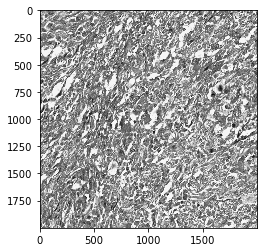

In [10]:
plt.imshow(img[:,:,0], cmap='Greys_r')

In [11]:
img[:,:,0].shape

(2000, 2000)

In [43]:
D = Region_extract(img[:,:,0], '01', '01')

In [44]:
cv2.imwrite("000"+".jpg",D[0])

True

In [45]:
img[:,:,0].shape

(2000, 2000)

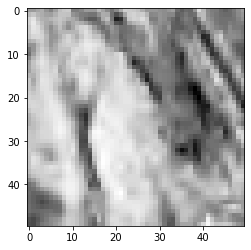

In [46]:
plt.imshow(D[0], cmap='Greys_r')

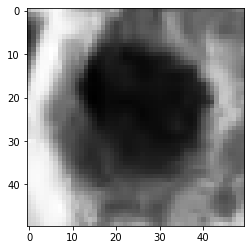

In [16]:
plt.imshow(D[1], cmap='Greys_r')

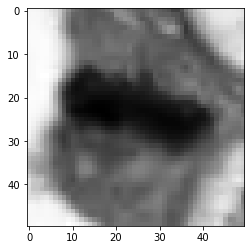

In [17]:
plt.imshow(D[2], cmap='Greys_r')

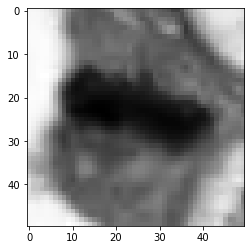

In [18]:
plt.imshow(D[2], cmap='Greys_r')

In [19]:
len(D)

3

In [20]:
RMRD = RMr_count(D[0], 120)

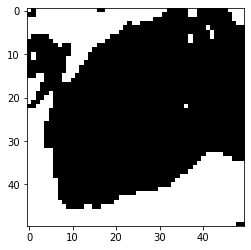

In [21]:
plt.imshow(RMRD[1], cmap='Greys_r')

In [47]:
path ='C:/Users/iris168/73 mitoses  cases -breast cancer/mitoses_image_data_part_1/06/'
img = cv2.imread(path+'01.tif')

In [50]:
data_loc = '01'
img_loc = 'C:/Users/iris168/73 mitoses  cases -breast cancer/mitoses_image_data_part_1/06/'+ data_loc+'.tif'
img = cv2.imread(img_loc)

In [51]:
print(img)

[[[245 242 243]
  [244 242 239]
  [244 240 240]
  ...
  [158 104 172]
  [162 105 186]
  [164 115 203]]

 [[242 237 244]
  [241 237 240]
  [242 237 240]
  ...
  [173 115 183]
  [165  97 172]
  [150  94 175]]

 [[241 239 244]
  [240 237 240]
  [240 237 240]
  ...
  [176 118 173]
  [156  91 146]
  [141  83 139]]

 ...

 [[185 147 227]
  [183 145 224]
  [177 141 215]
  ...
  [173 134 210]
  [171 132 207]
  [169 129 204]]

 [[177 140 198]
  [182 142 200]
  [182 140 206]
  ...
  [171 131 207]
  [169 128 204]
  [166 125 201]]

 [[156 116 157]
  [159 118 158]
  [165 124 161]
  ...
  [169 128 205]
  [168 125 203]
  [165 122 200]]]


In [28]:
plt.imshow(img[:,:,0], cmap='Greys_r')

TypeError: 'NoneType' object is not subscriptable

In [ ]:
D = Region_extract(img[:,:,0],'06','06')

In [130]:
Score = []
for i in range (1,100):
    if (i <10):
        data_loc = '0'+str(i)
    else:
        data_loc = str(i)
    #print(data_loc)
    img_loc = 'C:/Users/iris168/73 mitoses  cases -breast cancer/mitoses_image_data_part_2/23/'+ data_loc+'.tif'
    img = cv2.imread(img_loc)
    D = Region_extract(img[:,:,0],'23',data_loc)
    for k in range(len(D)):
        for j in range (0,255):
            #print('j',j)
            #print(RMr_count(D[k], j)[0])
            if (RMr_count(D[k], j)[0] >= 58 and RMr_count(D[k], j)[0] <= 63):
                #cv2.imwrite("18"+data_loc+str(k)+".jpg",D[k])
                Score.append([i,k,j])

TypeError: 'NoneType' object is not subscriptable

In [131]:
Score

[[1, 0, 90],
 [1, 0, 91],
 [1, 0, 92],
 [1, 1, 89],
 [1, 1, 90],
 [1, 2, 77],
 [1, 2, 78],
 [2, 0, 104],
 [3, 0, 109],
 [3, 0, 110],
 [4, 0, 91],
 [4, 0, 92],
 [4, 0, 93],
 [4, 0, 94],
 [4, 1, 93],
 [4, 1, 94],
 [4, 1, 95],
 [4, 2, 96],
 [4, 2, 97],
 [5, 0, 82],
 [5, 0, 83],
 [5, 0, 84],
 [5, 0, 85],
 [5, 0, 86],
 [6, 0, 95],
 [6, 0, 96],
 [7, 0, 99],
 [8, 0, 83],
 [8, 0, 84],
 [8, 0, 85],
 [9, 0, 95],
 [9, 0, 96],
 [9, 0, 97],
 [10, 0, 82],
 [10, 0, 83],
 [11, 0, 81],
 [11, 0, 82],
 [11, 0, 83],
 [12, 0, 84],
 [12, 0, 85],
 [12, 0, 86],
 [13, 0, 95],
 [13, 0, 96],
 [14, 0, 62],
 [14, 0, 63],
 [14, 1, 69],
 [14, 1, 70],
 [14, 2, 88],
 [14, 2, 89],
 [15, 0, 70],
 [15, 0, 71],
 [15, 0, 72],
 [15, 0, 73],
 [15, 1, 90],
 [15, 1, 91],
 [16, 0, 114],
 [17, 0, 98],
 [17, 0, 99],
 [17, 1, 86],
 [17, 1, 87],
 [17, 1, 88],
 [17, 1, 89],
 [17, 1, 90],
 [18, 0, 98],
 [18, 1, 89],
 [18, 1, 90],
 [18, 2, 79],
 [18, 2, 80],
 [19, 0, 91],
 [19, 0, 92],
 [20, 0, 107],
 [21, 0, 93],
 [21, 0, 94],
 [21, 

In [132]:
x = Score[0][0]
y = Score[0][1]
Score_reduce = [Score[0]]
for m in range(1,len(Score)):
    if (Score[m][0] != x) or (Score[m][1] != y):
        Score_reduce.append(Score[m])
        x = Score[m][0]
        y = Score[m][1]

In [133]:
Score_reduce

[[1, 0, 90],
 [1, 1, 89],
 [1, 2, 77],
 [2, 0, 104],
 [3, 0, 109],
 [4, 0, 91],
 [4, 1, 93],
 [4, 2, 96],
 [5, 0, 82],
 [6, 0, 95],
 [7, 0, 99],
 [8, 0, 83],
 [9, 0, 95],
 [10, 0, 82],
 [11, 0, 81],
 [12, 0, 84],
 [13, 0, 95],
 [14, 0, 62],
 [14, 1, 69],
 [14, 2, 88],
 [15, 0, 70],
 [15, 1, 90],
 [16, 0, 114],
 [17, 0, 98],
 [17, 1, 86],
 [18, 0, 98],
 [18, 1, 89],
 [18, 2, 79],
 [19, 0, 91],
 [20, 0, 107],
 [21, 0, 93],
 [22, 0, 92]]

In [134]:
len(Score_reduce)

32

In [135]:
np.savetxt("Score_reduce23.txt",Score_reduce)

In [ ]:
cell_img = cv2.imread('J:/DATA_MERGE _rename/cells (1).jpg')

In [ ]:
print(cell_img)

In [ ]:
plt.imshow(cell_img, cmap='Greys_r')

In [ ]:
cell_img.shape

In [218]:
Score=np.loadtxt("C:/Users/iris168/DATA_MERGE_NEW_rename/Score.txt")

In [219]:
Score.shape

(1042, 3)

In [220]:
Score[:,2].max()

124.0

In [221]:
Score[:,2].min()

44.0

In [222]:
Score[:,2]

array([ 66.,  59.,  66., ..., 107.,  93.,  92.])

In [223]:
Score_df = pd.DataFrame({'Score':Score[:,2]})

In [224]:
Score_df.describe()

,Score
count,1042.000000
mean,83.617083
std,12.582569
min,44.000000
25%,76.000000
50%,84.000000
75%,92.000000
max,124.000000


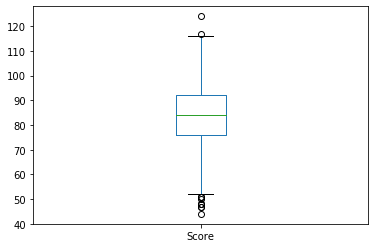

In [225]:
Score_df.plot.box()

In [235]:
labels = []
for i in range(0,1042):
    if (Score[:,2][i] < Score[:,2].min()+35):
        labels.append(0)
    elif (Score[:,2][i] > Score[:,2].max()-35):
        labels.append(1)
    else:
        labels.append(2)

In [236]:
labels_df = pd.DataFrame({'labels':labels})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257D516F080>]],
      dtype=object)

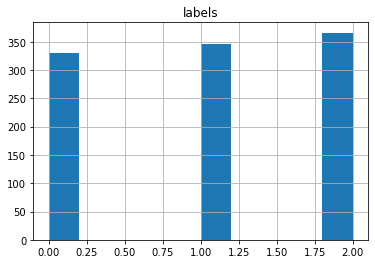

In [237]:
labels_df.hist()

In [194]:
labels_df

,labels
0,0
1,0
2,0
3,2
4,2
5,0
6,2
7,0
8,0
9,2
